conda create -n imgaug python=3.8 
conda activate imgaug
conda install ipykernel
pip install imgaug==0.4.0 -i https://pypi.tuna.tsinghua.edu.cn/simple
pip uninstall matplotlib scikit-image scipy numpy
pip install numpy==1.19 matplotlib scikit-image scipy -i https://pypi.tuna.tsinghua.edu.cn/simple

pip install tqdm -i https://pypi.tuna.tsinghua.edu.cn/simple

## 图像增强

In [3]:
import imgaug.augmenters as iaa
import numpy as np

environments = {'normal': iaa.Sequential([iaa.Noop()]),
                'dark' : iaa.Sequential([
                                        # iaa.BlendAlpha(0.5, foreground=iaa.Add(100), background=iaa.Multiply(0.2), seed=31),
                                        iaa.MultiplyAndAddToBrightness(mul=0.4, add=-15, seed=1991)]),
                'fog'  : iaa.Sequential([iaa.CloudLayer(intensity_mean=225, intensity_freq_exponent=-2, intensity_coarse_scale=2, alpha_min=1.0,
                                        alpha_multiplier=0.9, alpha_size_px_max=10, alpha_freq_exponent=-2, sparsity=0.9, density_multiplier=0.5, seed=35)]),
                'rain' : iaa.Sequential([iaa.Rain(drop_size=(0.05, 0.1), speed=(0.04, 0.06), seed=38),
                                        iaa.Rain(drop_size=(0.05, 0.1), speed=(0.04, 0.06), seed=35),
                                        iaa.Rain(drop_size=(0.1, 0.2), speed=(0.04, 0.06), seed=73),
                                        iaa.Rain(drop_size=(0.1, 0.2), speed=(0.04, 0.06), seed=93),
                                        iaa.Rain(drop_size=(0.05, 0.2), speed=(0.04, 0.06), seed=95)]),
                'snow' : iaa.Sequential([iaa.Snowflakes(flake_size=(0.5, 0.8), speed=(0.007, 0.03), seed=38),
                                        iaa.Snowflakes(flake_size=(0.5, 0.8), speed=(0.007, 0.03), seed=35),
                                        iaa.Snowflakes(flake_size=(0.6, 0.9), speed=(0.007, 0.03), seed=74),
                                        iaa.Snowflakes(flake_size=(0.6, 0.9), speed=(0.007, 0.03), seed=94),
                                        iaa.Snowflakes(flake_size=(0.5, 0.9), speed=(0.007, 0.03), seed=96)]),
                'fog_rain' : iaa.Sequential([iaa.CloudLayer(intensity_mean=225, intensity_freq_exponent=-2, intensity_coarse_scale=2, alpha_min=1.0,
                                            alpha_multiplier=0.9, alpha_size_px_max=10, alpha_freq_exponent=-2, sparsity=0.9, density_multiplier=0.5, seed=35),
                                            iaa.Rain(drop_size=(0.05, 0.2), speed=(0.04, 0.06), seed=35),
                                            iaa.Rain(drop_size=(0.05, 0.2), speed=(0.04, 0.06), seed=36)]),
                'fog_snow' : iaa.Sequential([iaa.CloudLayer(intensity_mean=225, intensity_freq_exponent=-2, intensity_coarse_scale=2, alpha_min=1.0,
                                            alpha_multiplier=0.9, alpha_size_px_max=10, alpha_freq_exponent=-2, sparsity=0.9, density_multiplier=0.5, seed=35),
                                            iaa.Snowflakes(flake_size=(0.5, 0.9), speed=(0.007, 0.03), seed=35),
                                            iaa.Snowflakes(flake_size=(0.5, 0.9), speed=(0.007, 0.03), seed=36)]),
                'rain_snow' : iaa.Sequential([iaa.Snowflakes(flake_size=(0.5, 0.8), speed=(0.007, 0.03), seed=35),
                                            iaa.Rain(drop_size=(0.05, 0.1), speed=(0.04, 0.06), seed=35),
                                            iaa.Rain(drop_size=(0.1, 0.2), speed=(0.04, 0.06), seed=92),
                                            iaa.Rain(drop_size=(0.05, 0.2), speed=(0.04, 0.06), seed=91),
                                            iaa.Snowflakes(flake_size=(0.6, 0.9), speed=(0.007, 0.03), seed=74)]),
                'light': iaa.Sequential([iaa.MultiplyAndAddToBrightness(mul=1.6, add=(0, 30), seed=1992)]),
                'wind' : iaa.Sequential([iaa.MotionBlur(15, seed=17)])
                }



### Example

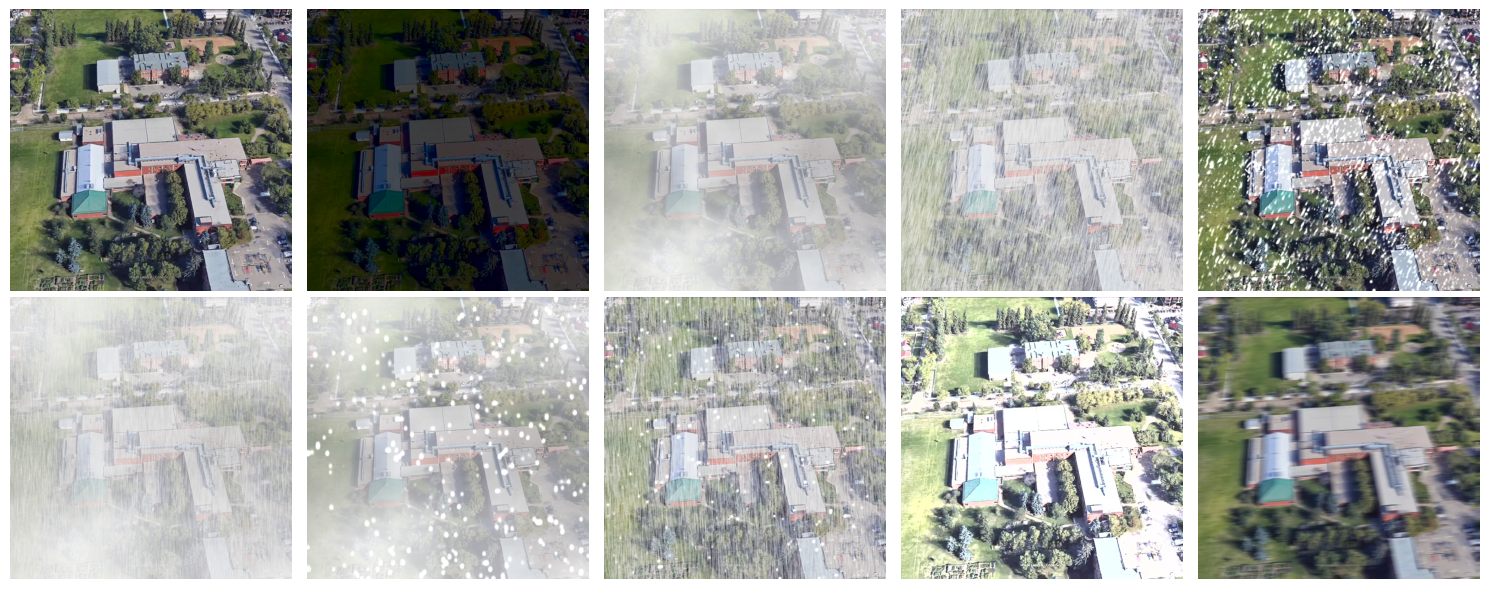

In [4]:
query_path = "University-Release/test/query_drone/0000/image-01.jpeg"

import matplotlib.pyplot as plt

img = plt.imread(query_path)
plt.figure(figsize=(15, 6))
for cnt, aug in enumerate(environments):
    plt.subplot(2, 5, cnt+1)
    plt.imshow(environments[aug](image=img))
    plt.axis('off')

plt.tight_layout()  
plt.show()

In [5]:
from PIL import Image
weathers = list(environments)
img = Image.open(query_path)
img = np.array(img)

weather = np.random.choice(weathers)
img_aug = environments[weather](image=img)
img_aug = Image.fromarray(img_aug)
img_aug.save('aug.jpg')



### 创建增强数据集

#### 整体拷贝（不要再运行了！）

In [6]:
import os
import shutil

source_path = os.path.abspath(r'University-Release')
target_path = os.path.abspath(r'University-Release-wx')

if not os.path.exists(target_path):
    os.makedirs(target_path)
    shutil.copytree(source_path, target_path)
    print('copy dataset finished!')

if os.path.exists(source_path):
    #shutil.rmtree(target_path)
    pass

In [7]:

def getFileList(dir,Filelist, ext=None):
    newDir = dir
    if os.path.isfile(dir):
        #if str(dir).endswith('png') or str(dir).endswith('jpeg') or str(dir).endswith('jpg'):
        Filelist.append(dir)

    
    elif os.path.isdir(dir):
        for s in os.listdir(dir):
            newDir=os.path.join(dir,s)
            getFileList(newDir, Filelist, ext)
 
Filelist = []
dir_enhance = os.path.join(source_path, 'train', 'drone')
getFileList(dir_enhance, Filelist)

print('Got to be changed imgs path!')


Got to be changed imgs path!


使用`University-Release`中`train/drone`的图像数据，对每个图像随机分配天气增强后，保存到`University-Release-wx`的对应目录下

In [9]:
weathers = list(environments)
from tqdm import tqdm

def process_aug(Filelist):
    for img_file in tqdm(Filelist, desc='Processing'):   
        img = Image.open(img_file)
        img = np.array(img)

        weather = np.random.choice(weathers)
        img_aug = environments[weather](image=img)

        img_aug = Image.fromarray(img_aug)
        save_file = img_file.replace('University-Release', 'University-Release-wx')
        img_aug.save(save_file)
    

In [12]:
Filelist2 = []
dir_enhance = os.path.join(source_path, 'test', 'query_drone')
getFileList(dir_enhance, Filelist2)
process_aug(Filelist2)

Processing: 100%|██████████| 37855/37855 [1:53:09<00:00,  5.58it/s]  
